INSTALL DEPENDENCIES(to be run only once)

In [2]:
# Install required libraries (run once)
# If using Jupyter Notebook, uncomment and run

#!pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib


IMPORT LIBRARIES

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Model saving
import joblib

# Plot settings
plt.style.use("default")


DATASET INTEGRATION

In [ ]:
# Load the Telco Customer Churn dataset
df = pd.read_csv("telco_churn.csv")

# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Display basic information about the dataset
df.shape
# View column names
df.columns
# Check data types and non-null counts
df.info()
# Check for missing values in each column
df.isnull().sum()
# View statistical summary of numerical features
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


EXPLORATORY DATA ANALYSIS


Churn Counts:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn Percentage:
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


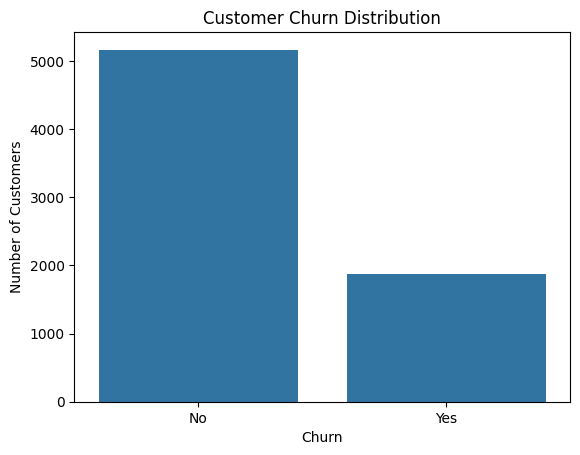

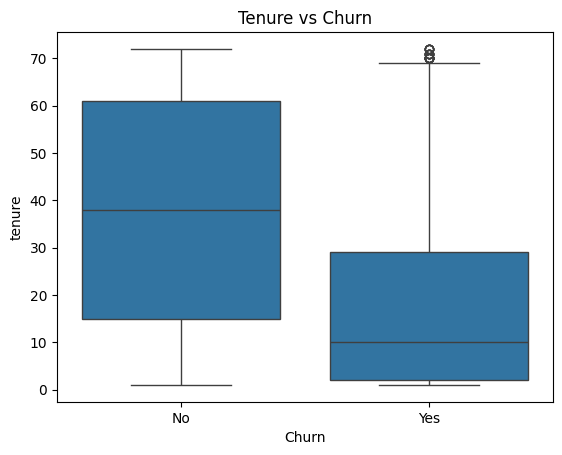

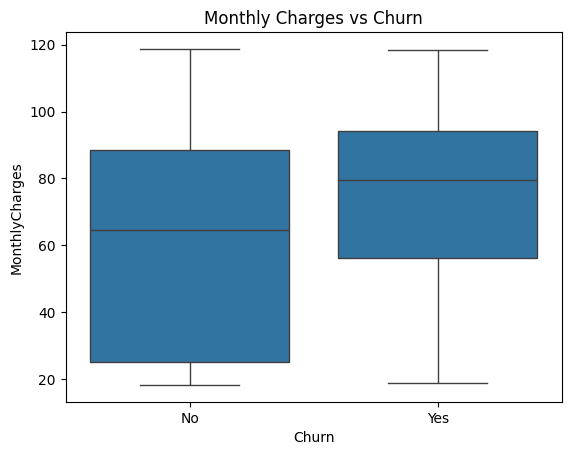

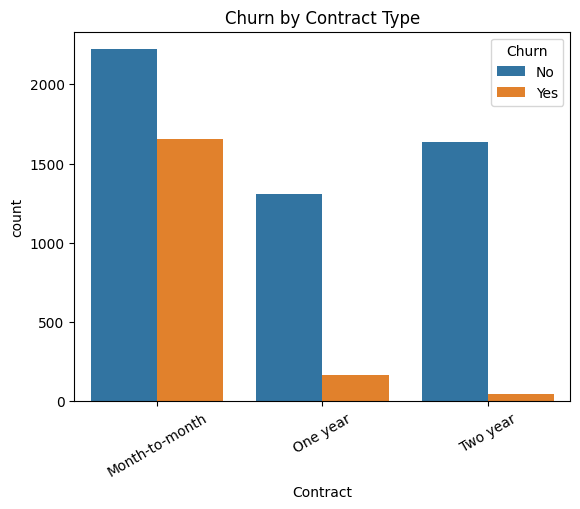

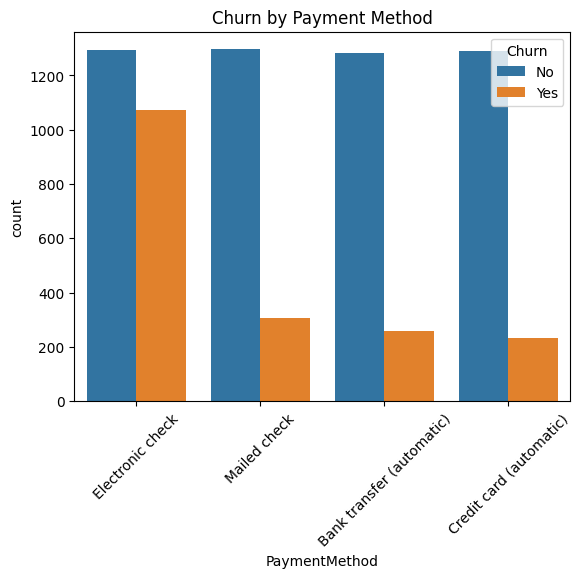

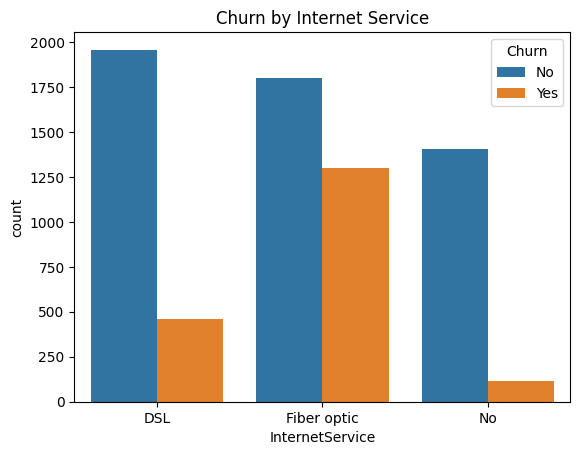

In [12]:
# TARGET VARIABLE ANALYSIS

# Churn distribution (counts and percentage)
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print("\nChurn Counts:\n", churn_counts)
print("\nChurn Percentage:\n", churn_percent)

# Visualize churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

# NUMERICAL FEATURE ANALYSIS

# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


# CATEGORICAL FEATURE ANALYSIS

# Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=30)
plt.show()

# Churn by Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

# Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()



DATA CLEANING

In [13]:
# Create a copy of the dataset to avoid modifying the original unintentionally
df_clean = df.copy()

# Convert 'TotalCharges' column to numeric
# Some values are stored as strings with spaces, which need coercion
df_clean['TotalCharges'] = pd.to_numeric(
    df_clean['TotalCharges'],
    errors='coerce'
)

# Check how many values became NaN after conversion
df_clean['TotalCharges'].isnull().sum()

# Remove rows with missing values
# These rows are very few and do not impact overall model performance
df_clean.dropna(inplace=True)

# Reset index after dropping rows
df_clean.reset_index(drop=True, inplace=True)

# Final check to confirm no missing values remain
df_clean.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

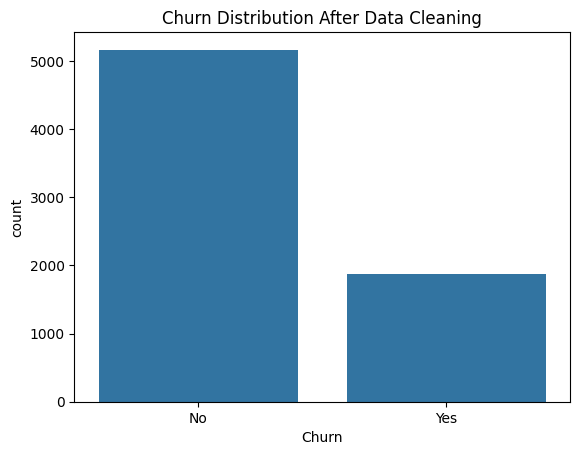

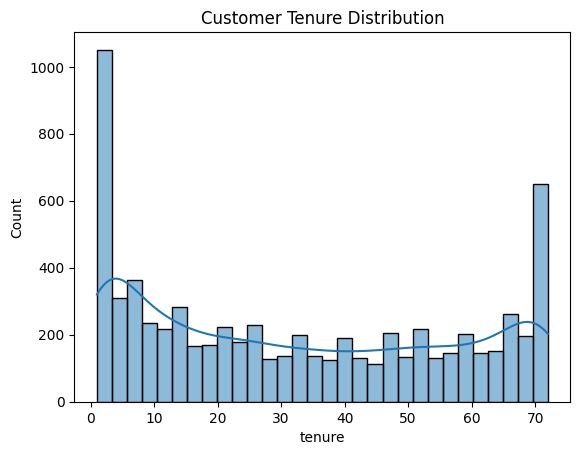

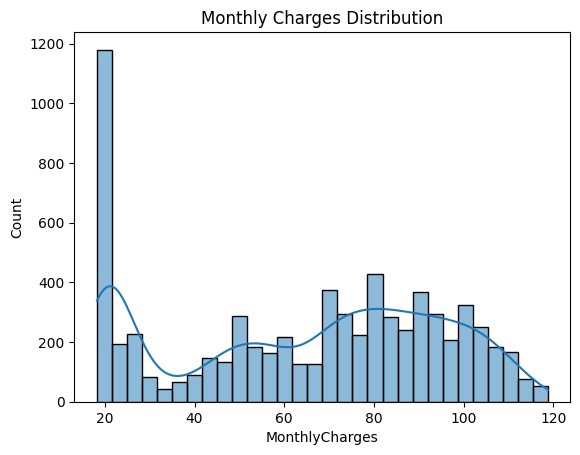

In [14]:
# Re-check churn distribution after data cleaning
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution After Data Cleaning")
plt.show()

# Tenure distribution after cleaning
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Customer Tenure Distribution")
plt.show()

# Monthly charges distribution after cleaning
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


FEATURE ENGINEERING

In [15]:
# FEATURE ENGINEERING
# 1. Encode binary categorical columns using Label Encoding
# These columns have only two categories (Yes/No)
binary_cols = ['Churn', 'Partner', 'Dependents', 'PaperlessBilling']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# 2. One-hot encode remaining categorical variables
# This avoids ordinal assumptions and works well for tree-based models
df = pd.get_dummies(df, drop_first=True)

# 3. Feature scaling for numerical columns
# Scaling is important for models like Logistic Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[num_cols] = scaler.fit_transform(df[num_cols])

# 4. Final dataset shape after feature engineering
df.shape


(7032, 7062)

MODEL TRAINING

In [19]:
# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Check class distribution to confirm imbalance
y.value_counts(normalize=True)

# Perform train-test split
# Stratify is used to preserve churn ratio in both train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Verify shapes after split
X_train.shape, X_test.shape

# Optional: Calculate scale_pos_weight for XGBoost
# This helps the model handle class imbalance better

negative_class = y_train.value_counts()[0]
positive_class = y_train.value_counts()[1]

scale_pos_weight = negative_class / positive_class
scale_pos_weight

# Verify distribution after split
print("Train churn distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest churn distribution:")
print(y_test.value_counts(normalize=True))

Train churn distribution:
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Test churn distribution:
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


In [20]:
# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the dataset into training and testing sets
# Stratify is used due to class imbalance in churn
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Initialize classification models

# Logistic Regression (baseline model)
log_model = LogisticRegression(max_iter=1000)

# Random Forest (tree-based ensemble model)
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

# XGBoost (advanced gradient boosting model)
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Train Logistic Regression model
log_model.fit(X_train, y_train)

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model.fit(X_train, y_train)

# Indicate successful training
print("All models trained successfully.")


All models trained successfully.


MODEL EVALUATION

In [34]:
# -------------------------------
# Model Evaluation & Comparison
# -------------------------------

# Store models in a dictionary for easy iteration
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Create a list to store evaluation results
results = []

# Loop through each model and evaluate
for model_name, model in models.items():
    
    # Predict class labels
    y_pred = model.predict(X_test)
    
    # Predict churn probabilities (if supported)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None
    
    # Append metrics
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC_AUC": roc_auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display comparison table
results_df


,Model,Accuracy,Precision,Recall,ROC_AUC
0,Logistic Regression,0.803127,0.648318,0.566845,0.836069
1,Random Forest,0.798152,0.649007,0.524064,0.828728
2,XGBoost,0.771144,0.576923,0.521390,0.821426


Model Performance Metrics:
Accuracy : 0.7711
Precision: 0.5769
Recall   : 0.5214
F1 Score : 0.5478
ROC-AUC  : 0.8214

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



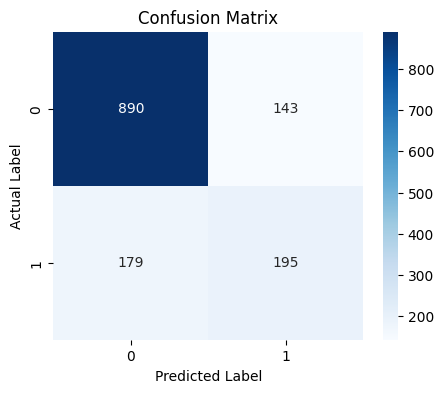

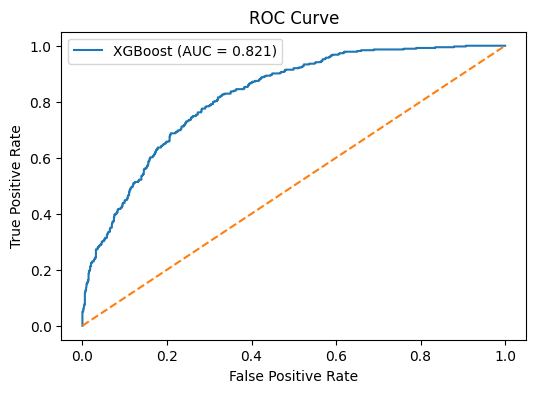

In [21]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# ------------------------------
# Evaluation Metrics
# ------------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Model Performance Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ------------------------------
# Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# ------------------------------
# ROC Curve
# ------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [23]:
# Extract feature importance from the trained XGBoost model
feature_importance = xgb_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
})

# Sort features by importance (descending)
importance_df = importance_df.sort_values(
    by="Importance",
    ascending=False
)

# Display top 15 most important features
importance_df.head(15)


,Feature,Importance
7042,InternetService_Fiber optic,0.213329
7057,Contract_Two year,0.177462
7044,OnlineSecurity_No internet service,0.108669
7043,InternetService_No,0.083374
7056,Contract_One year,0.071595
7059,PaymentMethod_Electronic check,0.028343
3,tenure,0.028015
7055,StreamingMovies_Yes,0.019295
7048,DeviceProtection_No internet service,0.019097
7053,StreamingTV_Yes,0.018427


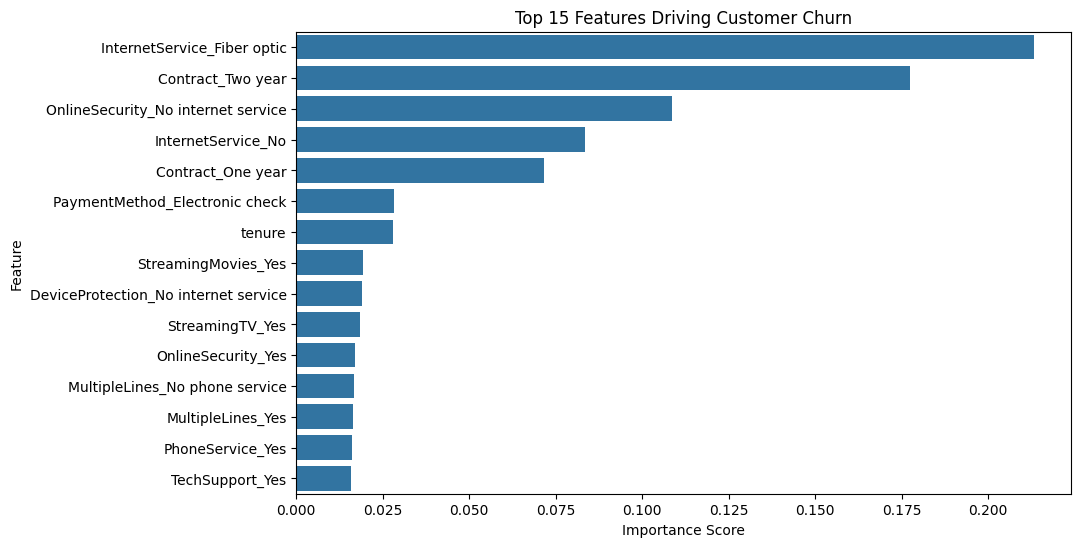

In [25]:
# Visualize top churn-driving features
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df.head(15)
)
plt.title("Top 15 Features Driving Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


CHURN PROBABILITY ANALYSIS

In [29]:
# Create a copy of test data for analysis
churn_results = X_test.copy()

# Add actual churn labels
churn_results['Actual_Churn'] = y_test.values

# Add predicted churn probabilities
churn_results['Churn_Probability'] = y_prob

# Sort customers by highest churn risk
churn_results_sorted = churn_results.sort_values(
    by='Churn_Probability',
    ascending=False
)

# Display top high-risk customers
churn_results_sorted.head(10)




,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Actual_Churn,Churn_Probability
2631,1,1,0,-1.035784,1,1.145193,-0.713775,False,False,False,...,True,False,True,False,False,False,True,False,1,0.951457
2464,0,0,0,-1.280248,1,0.410579,-0.973326,False,False,False,...,False,False,False,False,False,False,True,False,1,0.950343
3727,0,0,0,-1.198760,1,1.057106,-0.878581,False,False,False,...,True,False,True,False,False,False,True,False,1,0.946595
5826,0,1,0,-1.280248,1,0.483708,-0.972355,False,False,False,...,True,False,False,False,False,False,False,False,1,0.938409
1731,1,0,0,-1.280248,1,0.159614,-0.976657,False,False,False,...,False,False,False,False,False,False,True,False,1,0.937162
2900,1,1,1,-1.280248,1,0.147980,-0.976811,False,False,False,...,False,False,False,False,False,False,True,False,1,0.936241
4585,1,0,0,-1.280248,1,0.673179,-0.969841,False,False,False,...,False,False,True,False,False,False,True,False,1,0.935476
3906,0,1,0,-1.280248,0,0.465426,-0.972598,False,False,False,...,True,False,False,False,False,False,True,False,1,0.934440
3682,0,0,0,-1.280248,1,0.142993,-0.976877,False,False,False,...,False,False,False,False,False,False,True,False,1,0.932947
2753,0,0,0,-1.280248,0,1.025527,-0.965164,False,False,False,...,True,False,True,False,False,False,False,True,1,0.932667


In [30]:
# Summary statistics of churn probabilities
churn_results['Churn_Probability'].describe()


count    1407.000000
mean        0.272629
std         0.280013
min         0.001099
25%         0.025763
50%         0.161217
75%         0.486366
max         0.951457
Name: Churn_Probability, dtype: float64

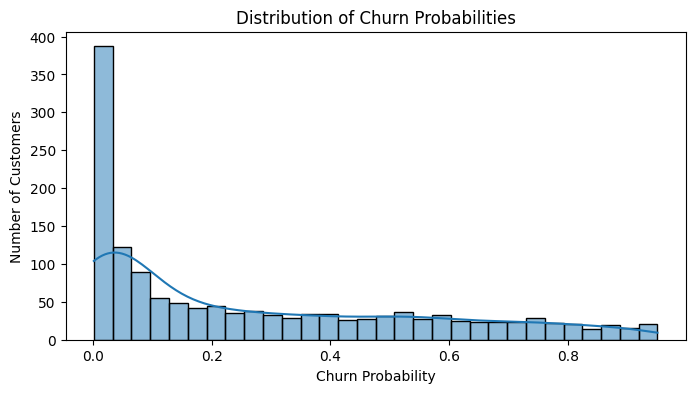

Risk_Segment
Low Risk       872
Medium Risk    298
High Risk      237
Name: count, dtype: int64

In [32]:
# Visualize churn probability distribution
plt.figure(figsize=(8, 4))
sns.histplot(churn_results['Churn_Probability'], bins=30, kde=True)
plt.title("Distribution of Churn Probabilities")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.show()

# Segment customers into risk buckets
churn_results['Risk_Segment'] = pd.cut(
    churn_results['Churn_Probability'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

# Count customers in each risk segment
churn_results['Risk_Segment'].value_counts()


SAVE THE TRAINED  MODEL

In [33]:
# Save the trained XGBoost model for future use
# This allows reuse without retraining

import joblib

joblib.dump(xgb_model, "churn_model.pkl")

print("Model saved successfully as churn_model.pkl")


Model saved successfully as churn_model.pkl
